<a href="https://colab.research.google.com/github/sharath199324/almabetter_projects/blob/main/Almabetter_Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** sharath kumar


# **Project Summary -**

Business Challenge:
**Our client, an insurance company specializing in Health Insurance**, seeks our assistance in constructing a predictive model. **The objective is to forecast the interest of policyholders from the previous year in the company's Vehicle Insurance**. To achieve this, we leverage various data elements, including demographic information (such as gender, age, and region code type), vehicle details (vehicle age, damage), and policy-related parameters (premium, sourcing channel).


---


Data Exploration:
Initial steps involve importing essential libraries and examining the dataset's characteristics. **The dataset comprises 381,109 rows and 12 columns**, with no duplicate or missing data. We meticulously analyze the features and the corresponding data.


---


Data Wrangling:
During data wrangling, we create a backup dataset named 'df_copy.' The 'id' column, deemed unnecessary, is dropped. **Categorical columns like 'Driving_License' and 'Previously_Insured' are transformed from 1 and 0 to 'Yes' and 'No' for improved visualization**. Numeric columns ('Region_Code,' 'Annual_Premium,' and 'Policy_Sales_Channel') are converted from float to int to save space.


---


Exploratory Data Analysis (EDA):
**EDA includes data visualization, univariate analysis, and bivariate analysis** concerning the dependent variable. Insights from each chart are detailed. Additionally, a correlation heatmap and pairplot enhance comprehension.


---


Hypothesis Formulation and Testing:
Based on visualizations, **three hypothetical statements are formulated** and subjected to hypothesis tests. These statements revolve around the average annual premium, customer age, and standard deviation of annual premium.


---


Feature Engineering:
**Outliers in the 'Annual_Premium' column are addressed using the capping** method, as depicted in a subsequent boxplot. The 'Driving_License' column is dropped due to its lack of valuable information. One-hot encoding is applied to categorical features, **balancing an imbalanced dataset with SMOTE**. MinMax scaling is employed, and the data is split into an **80-20 train-test ratio.**


---


Machine Learning Model:
**Various models, including Logistic Regression Classifier, Random Forest Classifier, and XG-Boost, are applied.** Hyperparameter tuning using GridSearchCV yields improvements. **The Random Forest Classifier emerges with the highest F1-score of 87% on the test set**, indicating no overfitting.


---


Recommendations:
The insurance company can deploy a Random Forest Classifier-based machine learning model to predict the interest of existing health insurance customers in vehicle insurance. Strategies to enhance conversion rates, such as incentives and streamlining application and claim settlement processes, can be implemented. Cross-selling presents an opportunity to increase profits, considering the zero customer acquisition cost.

# **GitHub Link -**

https://github.com/sharath199324/almabetter_projects/blob/main/Almabetter_Health_Insurance_Cross_Sell_Prediction.ipynb

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers, now they need our help in **building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company**.

In order to predict whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Importing libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Importing Machine Learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Classification algorithm metrics
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

### Dataset Loading

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Dataset to variable 'df'
df = pd.read_csv('/content/drive/MyDrive/project files/alternative/Health_Insurance_Cross_Sell_Prediction-main/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

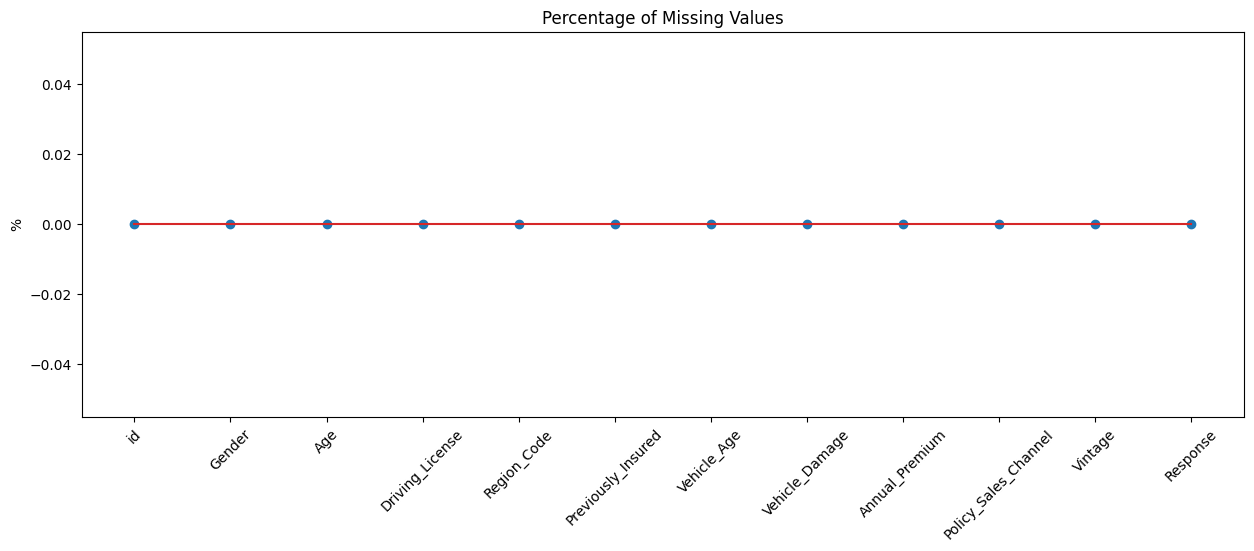

In [9]:
# Visualizing the missing values
missing_values_per = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

### What did you know about your dataset?

*   We have the dataset of health insurance customers and also the information regarding their vehicle.
*   The target variable is 'Response'.
*   The dataset has 3,81,109 entries and 14 columns. Out of the 14 columns, 3 are of **'object'** datatype and rest are of **'numeric'** datatype.
*   There are no missing values/duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

1. *id*: Unique row id
2. *gender*: Gender of the customer
3. *Age*: Age of the customer
4. *Driving_Licence*: Whether the customer holds a DL or not
5. *Region_Code*: Unique code fit the region of the customer
6. *Previously_Insured*: Whether the customer previously had an insurance or not
7. *Vehicle_Age*: Age of the vehicle
8. *Vehicle_Damage*: Whether the vehicle had past damages or not.
9. *Annual_Premium*: The annual premium customer has to pay.
10. *Policy_Sales_Channel*: Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. *Vintage*: Number of Days, Customer has been associated with the company
12. *Response*: Customer is interested or not

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

# Copying the dataset for backup
df_copy = df.copy()

# We can drop the 'id' column as it is not much of use for us
df.drop(['id'],axis=1, inplace=True)

### What all manipulations have you done and insights you found?

##### The categorical columns (Driving_License & Previously_Insured) has values 1 & 0. We need to convert it into Yes and No.

In [14]:
# Converting 'Driving_License' & 'Previously_Insured' from 1,0 to Yes and No.

df['Driving_License'] = df['Driving_License'].apply(lambda x: 'Yes' if x==1 else "No")
df['Previously_Insured']=df['Previously_Insured'].apply(lambda x: 'Yes' if x==1 else "No")

In [15]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,39,0


In [16]:
# Coverting 'Region_Code'	, 'Annual_Premium' &	'Policy_Sales_Channel' from float to int datatype to save space.

df['Region_Code']=df.Region_Code.astype(int)
df['Annual_Premium']=df.Annual_Premium.astype(int)
df['Policy_Sales_Channel']=df.Policy_Sales_Channel.astype(int)

In [17]:
# Divide Data in categorical and numerical features

numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [18]:
# Checking out some numerical features
numeric_features.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,28,40454,26,217,1
1,76,3,33536,26,183,0
2,47,28,38294,26,27,1
3,21,11,28619,152,203,0
4,29,41,27496,152,39,0


In [19]:
# Checking out some categorical features
categorical_features.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Male,Yes,No,> 2 Years,Yes
1,Male,Yes,No,1-2 Year,No
2,Male,Yes,No,> 2 Years,Yes
3,Male,Yes,Yes,< 1 Year,No
4,Female,Yes,Yes,< 1 Year,No


Initially, a backup dataset is generated and labeled 'df_copy.'

The 'id' column is excluded from our dataset due to its limited utility.

Categorical columns 'Driving_License' and 'Previously_Insured' are transformed from numerical values (1 and 0) to 'Yes' and 'No' to enhance visualization.

Conversion of data types is implemented for the 'Region_Code,' 'Annual_Premium,' and 'Policy_Sales_Channel' columns, shifting them from float to int to optimize storage space.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate analysis

#### Chart - 1

In [20]:
# Chart - 1 visualization code

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Response', ylabel='count'>

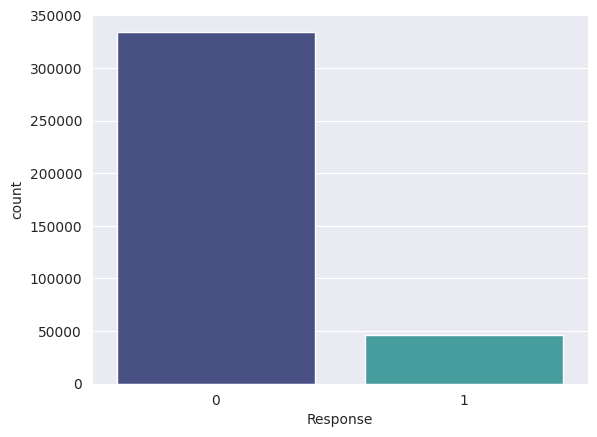

In [21]:
# Plotting a countplot for categorical variable- 'Response'

sns.countplot(x=df['Response'], data=df, palette='mako')

In [22]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the value count distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Out of the total respondants i.e 3,81,109 people, only 12.25% of (46,710) people were interested in buying the vehicle insurance from our company.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight sheds the light on the **cross selling conversion rate** of the company which is close to 12%. The company can improve the conversion rate by taking steps to encourage people to buy vehicle insurance by offering some **incentives/ease of application & claim settlement process.** Cross selling might be an effective way to increase the profits since the **customer acquisition cost still remains 0.**

#### Chart - 2

<Axes: xlabel='Previously_Insured', ylabel='count'>

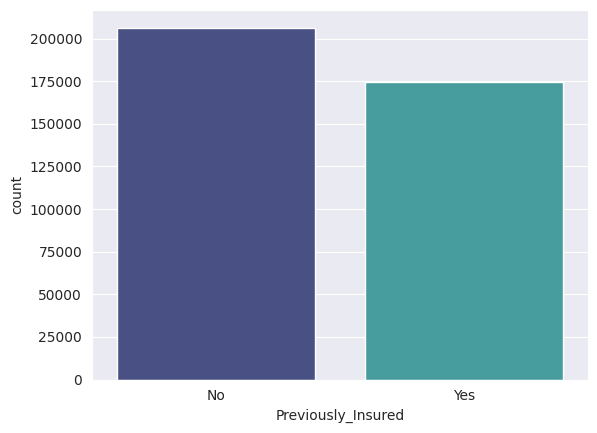

In [23]:
# Chart - 2 visualization code
# Plotting a countplot for categorical variable- 'Previously_Insured'

sns.countplot(x=df['Previously_Insured'], data=df, palette='mako')

In [24]:
df['Previously_Insured'].value_counts()

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the value count distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Out of the total respondants i.e 3,81,109 people, 54% (2,06,481) people had no previous vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the majority of the people had no previous vehicle insurance, the company gets access to an untapped market, thus creating a postive business impact.

#### Chart - 3

<Axes: xlabel='Vehicle_Age', ylabel='count'>

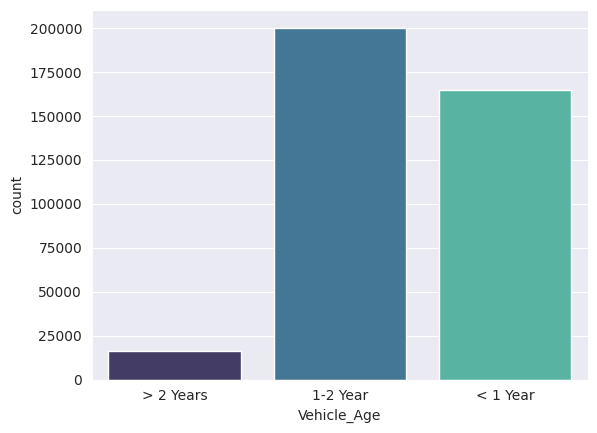

In [25]:
# Chart - 3 visualization code
# Plotting a countplot for categorical variable- 'Vehicle_Age'

sns.countplot(x=df['Vehicle_Age'], data=df, palette='mako')

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the value count distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

The majority of the vehicles possessed by the customers if in age range, < 1 year or 1-2 years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This can have a positive impact because, as most of them are young vehicles, the risk beared by the company is minimal. Also, the premium rates for newer vehicles are lower thus, making it more likely for the people to buy.

#### Chart - 4

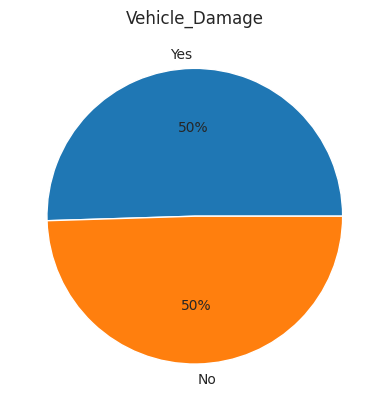

In [26]:
# Chart - 4 visualization code
# Plotting a piechart for categorical variable- 'Vehicle_Damage'

plt.pie(df['Vehicle_Damage'].value_counts(),labels = df['Vehicle_Damage'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('Vehicle_Damage')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Half the health insurance customers have previously damaged vehicles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This might lead to negative business impact because, 40-50% claim rate in vehicle insurance industry can have huge financial impact on the company.

#### Chart - 5

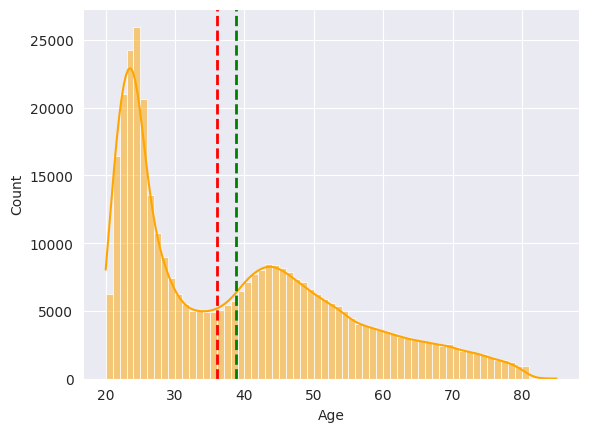

In [27]:
# Chart - 5 visualization code
# Plotting histplot for 'Age' column and visualzing mean (green line) and median (red line)

sns.histplot(df['Age'],kde=True,color='orange',bins=np.arange(df['Age'].min(), df['Age'].max() + 1))
plt.axvline(df['Age'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Age'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & median dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The first majority group the people are in their 20s and the second majority are in their 40s.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This can have a positive business impact because, as the majority of the customers' age is in range 20-30, they would have low health insurance premium rates, thereby giving them opportunity to buy a vehicle insurance as well.

#### Chart - 6

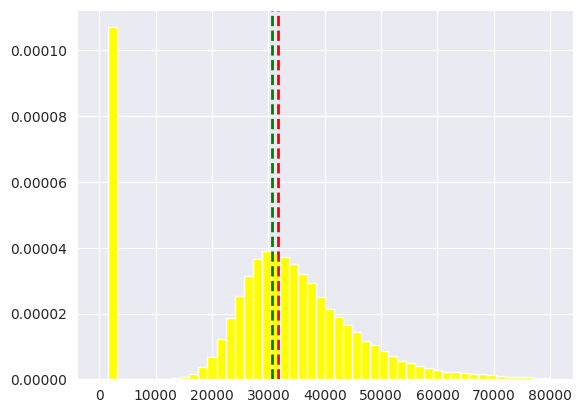

In [28]:
# Chart - 6 visualization code
# Plotting histplot for 'Annual_Premium' column and visualzing mean (green line) and median (red line)

df['Annual_Premium'].hist(bins = 50, density = True, range=[0, 80000],color='yellow')
plt.axvline(df['Annual_Premium'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Annual_Premium'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & median dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The annual premium of 2630 has the most frequency (64,877 entries) later which we can observe a normal distribution. This might indicate that this premium would not be of comprehensive type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the company knows the annual premium they have to offer and they can utilize this to market these different types of vehicle insurances better for different people according to their needs.

#### Chart - 7 Policy_Sales_Channel (Histplot)

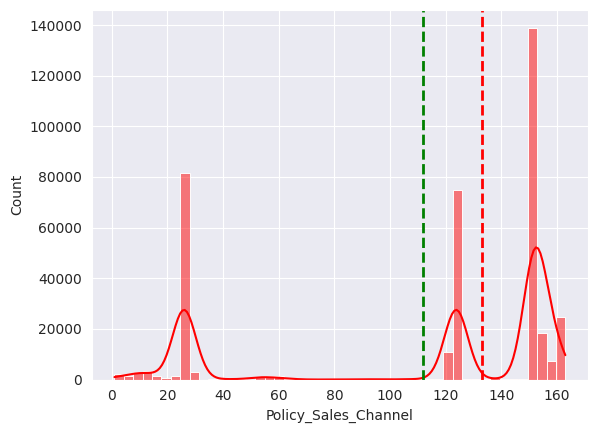

In [29]:
# Chart - 7 visualization code
# Plotting histplot for 'Policy_Sales_Channel' column and visualzing mean (green line) and median (red line)

sns.histplot(x=df['Policy_Sales_Channel'],kde=True,color='red')
plt.axvline(df['Policy_Sales_Channel'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Policy_Sales_Channel'].median(), color='red', linestyle='dashed', linewidth=2)

In [30]:
# Checking the top 20 policy channels
df['Policy_Sales_Channel'].value_counts().head(20)

152    134784
26      79700
124     73995
160     21779
156     10661
122      9930
157      6684
154      5993
151      3885
163      2893
13       1865
25       1848
7        1598
8        1515
30       1410
55       1264
155      1234
11       1203
1        1074
52       1055
Name: Policy_Sales_Channel, dtype: int64

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & median dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The data shows that **policy channel 152 is bringing most of it's customers** for the company, followed by policy channel 26 & 124.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart helps the marketing team for **better understanding** their sales channels, and also **help them decide the medium to allocate funds** for even better performance.

#### Chart - 8 Vintage (Boxplot)

<Axes: >

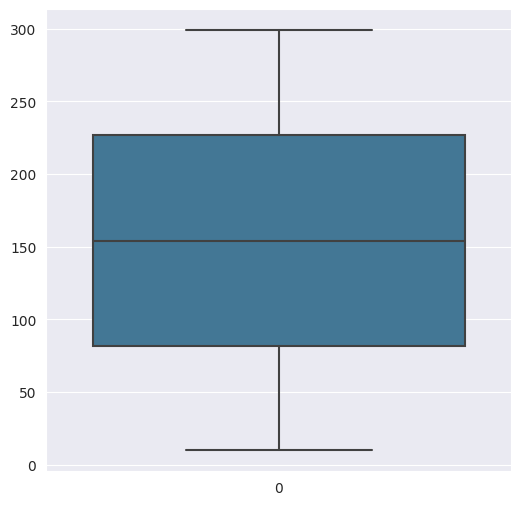

In [31]:
# Chart - 8 visualization code
# Plotting a boxplot for 'Vintage' column

plt.figure(figsize=(6,6))
sns.boxplot(df['Vintage'],palette='mako')

##### 1. Why did you pick the specific chart?

The Box plot chart helps in getting an all-round view of price distribution across neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

The boxplot suggests that there are customers ranging from 80-220 days are associated with the company, with the median age being 150 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data suggests, the longer customers are associated with the company, the more likely they are going to buy a vehicle insurance product.

### Bivariate Analysis

#### Chart - 9 Response vs Gender (Barplot)

<Axes: xlabel='Gender', ylabel='count'>

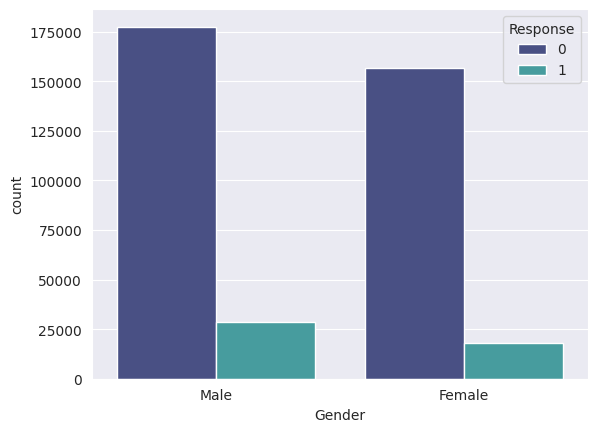

In [32]:
# Chart - 9 visualization code
# Plotting bartplot for 'Response' vs 'Gender' column

sns.countplot(x='Gender',hue='Response',palette="mako", data=df)

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the relationship of a categorical variable with respect to another categorical variable.

##### 2. What is/are the insight(s) found from the chart?

The data suggests there are slightly more male customers compared to female customers which also reflects on the cross sell rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This column cannot be considered for the ML algorithm therefore no positive/negative business impact is seen.

#### Chart - 10 Response vs Previously_Insured (Barplot)

<Axes: xlabel='Previously_Insured', ylabel='count'>

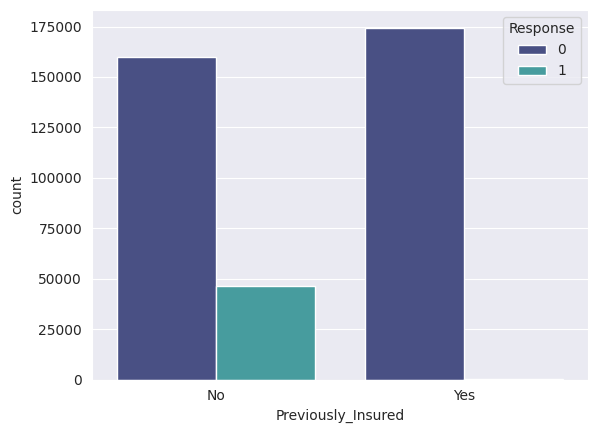

In [33]:
# Chart - 10 visualization code
# Plotting bartplot for 'Response' vs 'Previously_Insured' column

sns.countplot(x='Previously_Insured',hue='Response',palette="mako", data=df)

In [34]:
df['Previously_Insured'].value_counts()

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the relationship of a categorical variable wrt another categorical variable.

##### 2. What is/are the insight(s) found from the chart?

The customers who previously did not have a vehicle insurance had a cross sell conversion rate approximately of 20%. The customers with existing vehicle insurance had zero conversion rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As there's no conversion rate for customers who already had a previous insurance, the company can work on providing more competitive rates, to bring in more revenue.

#### Chart - 11 Response vs Vehicle_Age (Barplot)

<Axes: xlabel='Vehicle_Age', ylabel='count'>

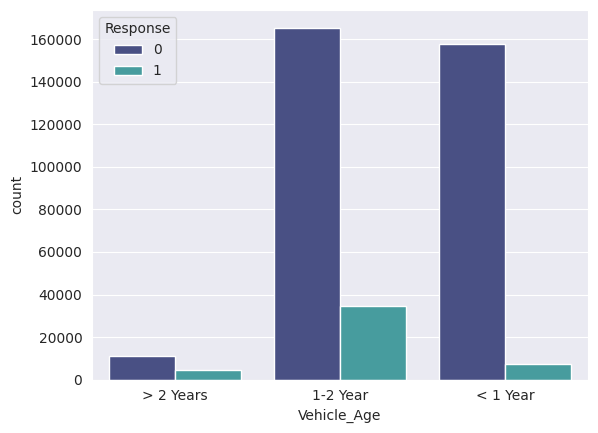

In [35]:
# Chart - 11 visualization code
# Plotting bartplot for 'Response' vs 'Vehicle_Age' column

sns.countplot(x='Vehicle_Age',hue='Response',palette="mako", data=df)

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the relationship of a categorical variable wrt another categorical variable.

##### 2. What is/are the insight(s) found from the chart?

The better performing range is 1-2 years, where we can see a higher positive response compared to the other 2 classes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This info can again help the marketing team to better target customers with vehicle age range of 1-2 years, thus having a positive business impact.

#### Chart - 12 Response vs Vehicle_Damage (Barplot)

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

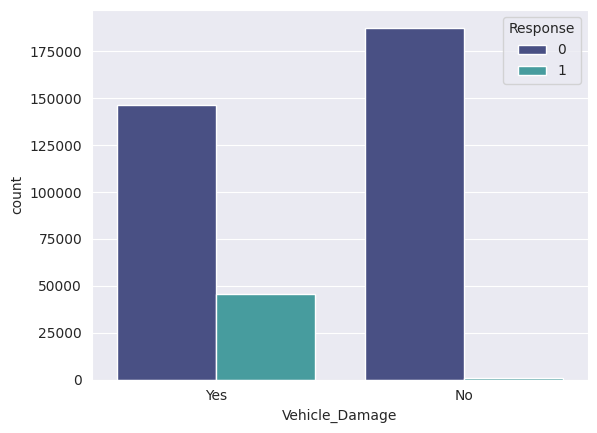

In [36]:
# Chart - 12 visualization code
# Plotting bartplot for 'Response' vs 'Vehicle_Damage' column

sns.countplot(x='Vehicle_Damage',hue='Response',palette="mako", data=df)

In [37]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the relationship of a categorical variable wrt another categorical variable.

##### 2. What is/are the insight(s) found from the chart?

We can observe from the data that only the customers with previous vehicle damage have shown interest in the vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This observation can lead to negative business growth as no previous damage customers are converting. This suggests that comprehensive premium might be higher than average.

#### Chart - 13 Response vs Age (Histogram)

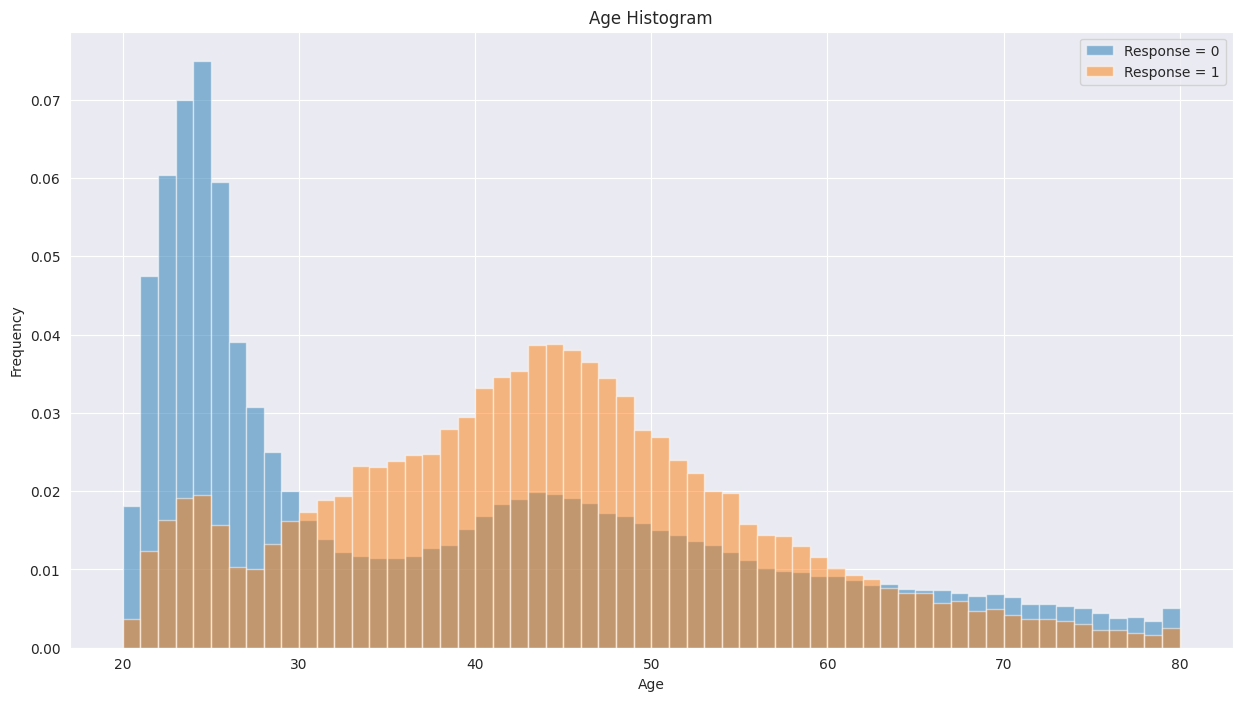

In [38]:
# Chart - 13 visualization code
# Plotting bartplot for 'Response' vs 'Age' column

df.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

##### 1. Why did you pick the specific chart?

A frequency histogram plot is used here to represent both Response & Age variables. This overlap lets us visualize the range of values of Age for which the Response would be Yes or No.

##### 2. What is/are the insight(s) found from the chart?

As we can see from the plot, the first age bracket i.e customers in their 20s are not showing interest in the product whereas, the second age cluster i.e cutomers in their 40s are showing much more interest towards the vehicle insurance product.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight also inturn suggests that the initial premium rates are higher because of which younger customers are not showing interest, whereas customers in older age bracket think this product is of value, therefore preferring it over the competitors.

#### Chart - 14 - Correlation Heatmap

<ipython-input-39-e58069d4942a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="viridis")


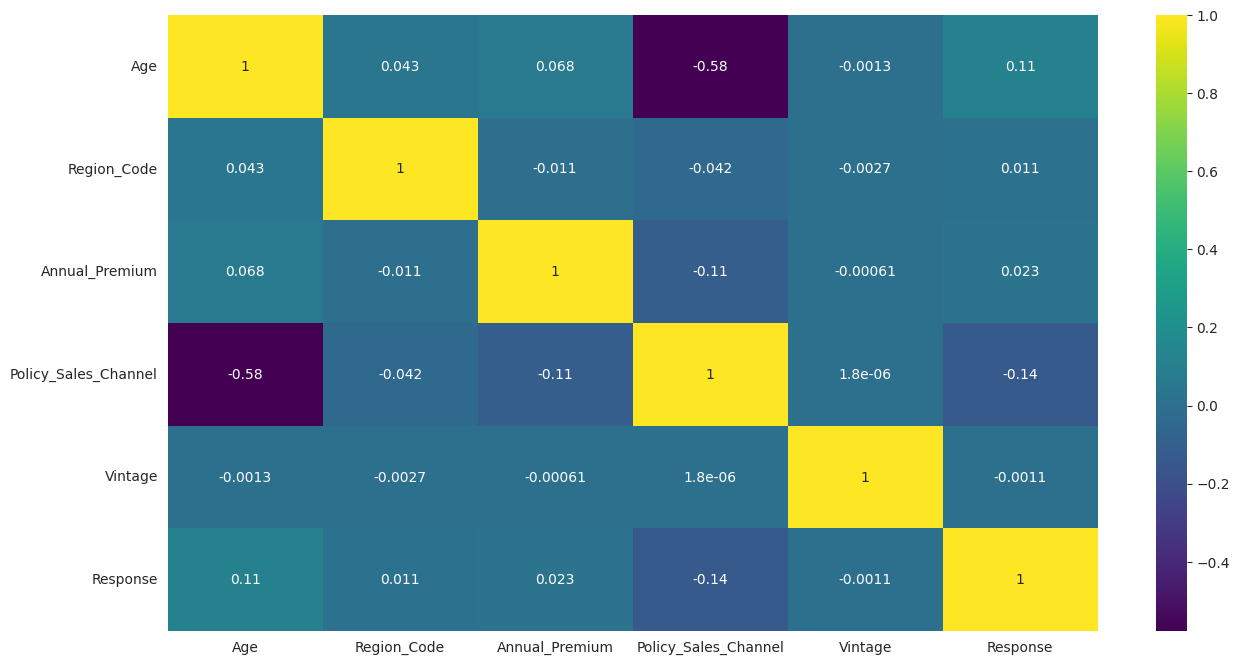

In [39]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

##### 1. What is/are the insight(s) found from the chart?

'Policy_Sales_channel' has the strongest (negative) correlation with 'Age'

#### Chart - 15 - Pair Plot

<Figure size 1500x800 with 0 Axes>

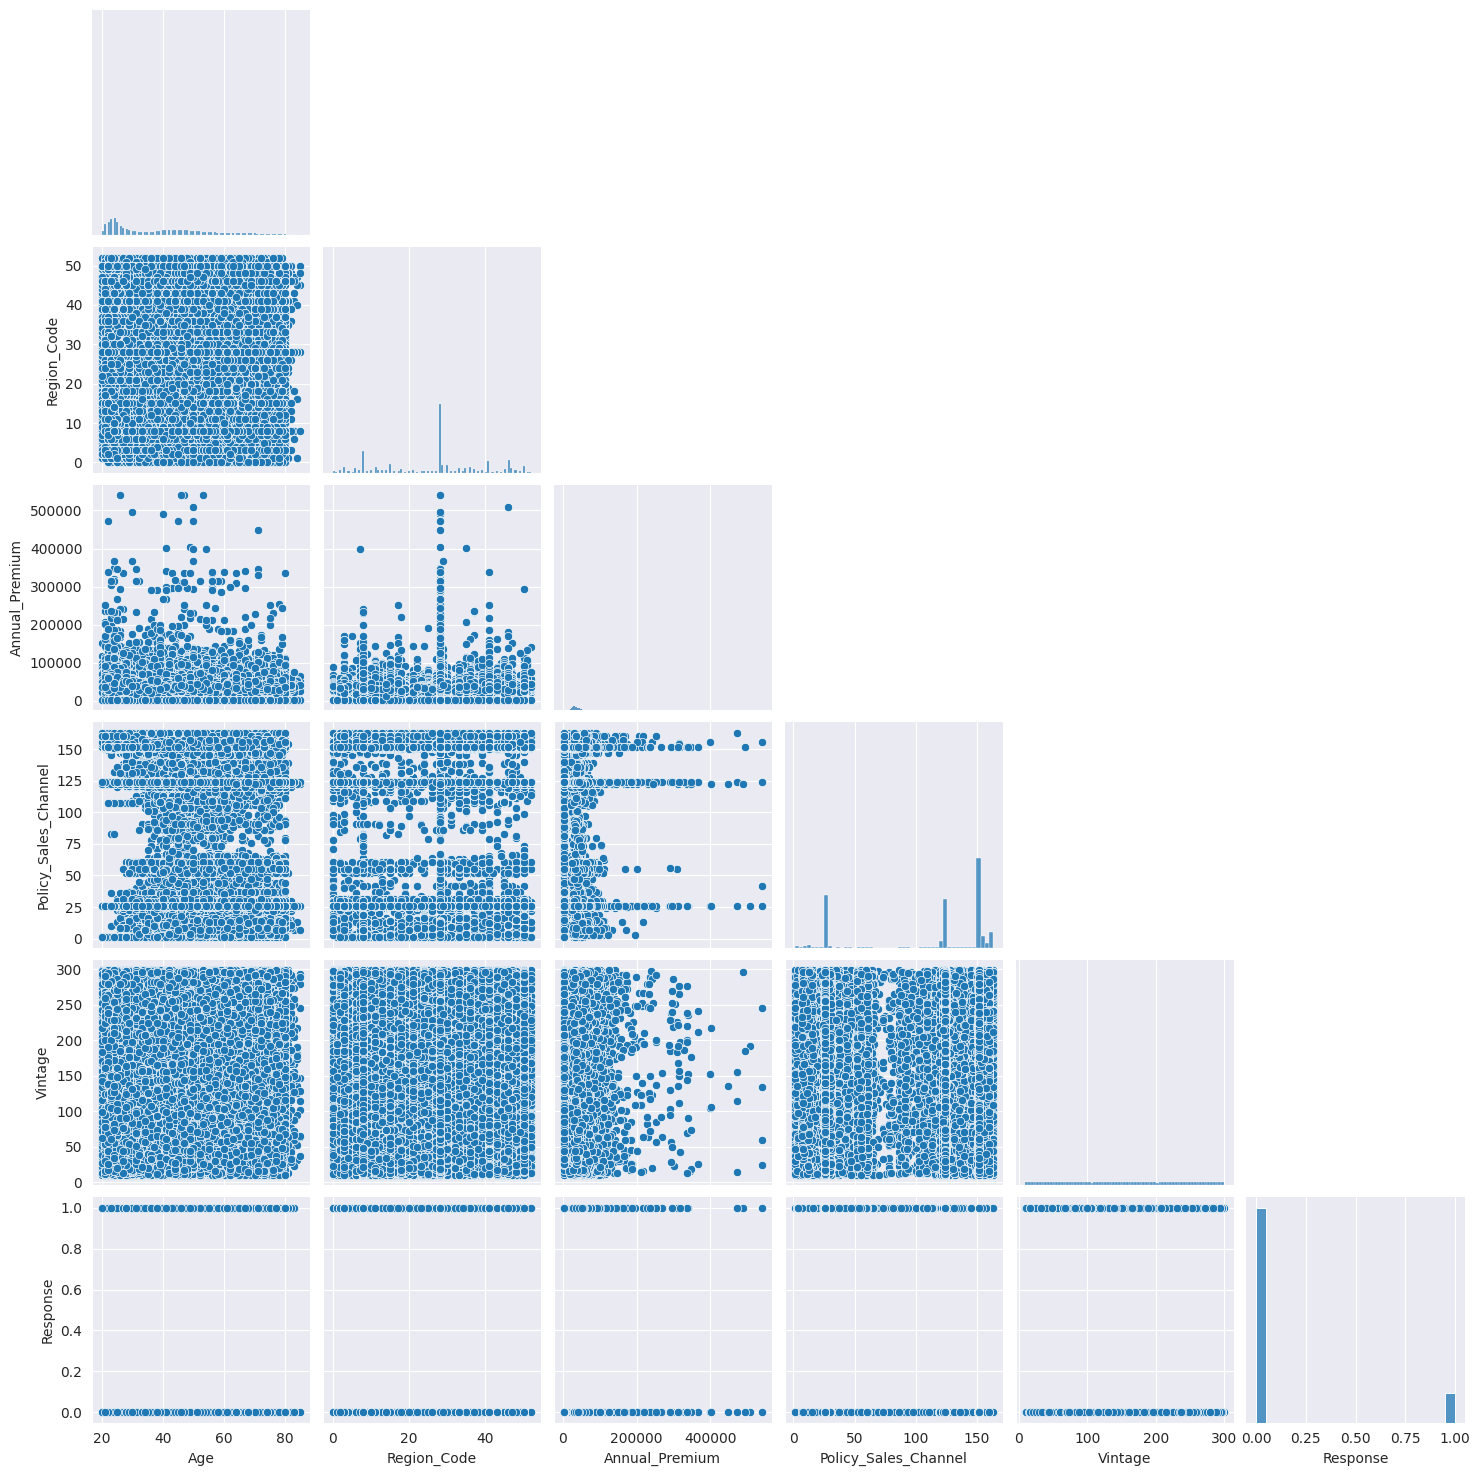

In [40]:
# Pair Plot visualization code
plt.figure(figsize=(15,8))
sns.pairplot(df, corner=True)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.   The average annual premium for a vehicle insurance is greater than 20,000.
2.   The average age of the customer is greater than 30.
3.   The Standard deviation of annual premium is greater than 10,000.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average annual premium for a vehicle insurance is greater than 20,000.


*   Null hypothesis H0: Average Annual premium = 20,000.

*   Alternate hypothesis Ha: Average Annual premium > 20,000.



#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

annual_premium_sample = df['Annual_Premium'].sample(500)
annual_premium_mean = np.mean(annual_premium_sample)
annual_premium_std = np.std(annual_premium_sample)

In [49]:
# Computing test statistic

ts1 = (annual_premium_mean-20000)/(annual_premium_std/(np.sqrt(500)))
print(ts1)

15.715195719702637


In [50]:
# Calculating the probability

prob_z = norm.cdf(ts1, 0, 1)
print(prob_z)

# P-Value
p1 = 1-prob_z
print(p1)

1.0
0.0


##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average anuual premium is greater than 20,000.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average age of the customer is greater than 30.
*   Null hypothesis H0: Average age = 30.

*   Alternate hypothesis Ha: Average age > 30.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

age_sample = df['Age'].sample(500)
age_mean = np.mean(age_sample)
age_std = np.std(age_sample)

In [52]:
# Computing test statistic

ts2 = (age_mean-30)/(age_std/(np.sqrt(500)))
print(ts2)

12.680138180505649


In [53]:
# Calculating the probability

prob_z = norm.cdf(ts2, 0, 1)
print(prob_z)

# P-Value
p1 = 1-prob_z
print(p1)

1.0
0.0


##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average age of customer is greater than 30.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Standard deviation of annual premium is greater than 10,000.
*   Null hypothesis H0: Standard deviation = 10,000.

*   Alternate hypothesis Ha: Standard deviation > 10,000.

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value

ap_sample = df['Annual_Premium'].sample(50)
S2 = (np.std(ap_sample))**2

In [55]:
# Computing test statistic

ts3 = (49 * S2)/(10000*10000)
print(ts3)

120.881586888804


In [56]:
# Calculating the probability
prob = chi2.cdf(ts3,49)
print(prob)

0.9999999476653747


##### Which statistical test have you done to obtain P-Value?

We have chosen Chi2-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for standard deviation, we have chosen Chi2-test to obtain p-value. The probability we have obtained is 99.99%, so we have sufficient evidence to reject H0. Therefore, the standard deviation of annual premium is greater than 10,000.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values.

### 2. Handling Outliers

<Axes: xlabel='Annual_Premium'>

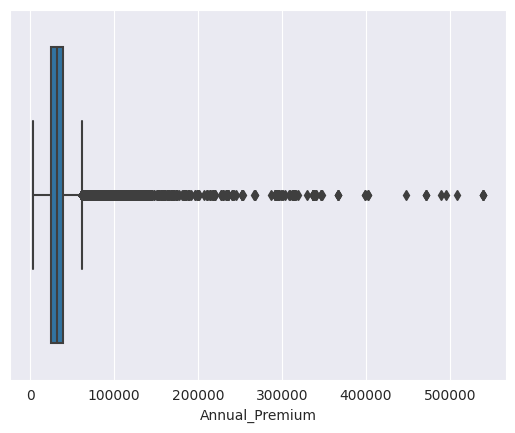

In [57]:
# Handling Outliers & Outlier treatments
# Plotting the boxplot for 'Annual_Premium'

sns.boxplot(x=df['Annual_Premium'])

In [58]:
# Finding the IQR

percentile25 = df['Annual_Premium'].quantile(0.25)
percentile75 = df['Annual_Premium'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [59]:
# Capping
# Capping the data above the upper limit to upper limit & below the lower limit to the lower limit

df['Annual_Premium'] = np.where(
    df['Annual_Premium'] > upper_limit,
    upper_limit,
    np.where(
        df['Annual_Premium'] < lower_limit,
        lower_limit,
        df['Annual_Premium']
    )
)

<Axes: xlabel='Annual_Premium'>

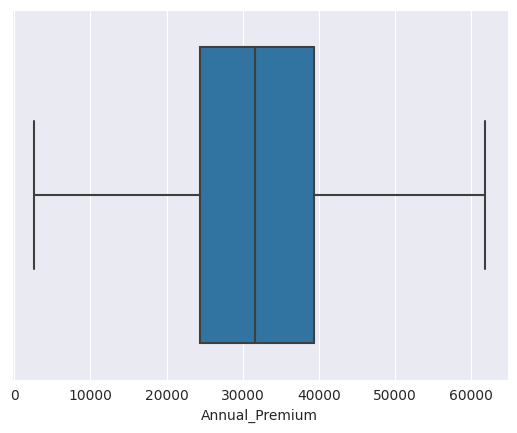

In [60]:
# Plotting the boxplot again to check for outliers
sns.boxplot(x=df['Annual_Premium'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used 'Capping' method to treat outliers. As there are only 3,81,109 entries in my dataset, trimming the outliers would lead to data loss.

### 3. Categorical Encoding

In [61]:
# Encode your categorical columns

# Using Pandas get Dummies for Encoding categorical features
df=pd.get_dummies(df,drop_first=True,sparse=True)

In [62]:
df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_Yes,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28,40454.0,26,217,1,1,1,0,0,1,1
1,76,3,33536.0,26,183,0,1,1,0,0,0,0
2,47,28,38294.0,26,27,1,1,1,0,0,1,1
3,21,11,28619.0,152,203,0,1,1,1,1,0,0
4,29,41,27496.0,152,39,0,0,1,1,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used One hot encoding, and also dropping the first column of each encoded column. This method is an effective technique used to represent categorical variables as numerical values for a machine learning model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [63]:
# Manipulate Features to minimize feature correlation and create new features

df['Driving_License_Yes'].value_counts()

1    380297
0       812
Name: Driving_License_Yes, dtype: int64

Since practically every customer has a driver's license, it is useless to insure anyone without one because it would be deterimental to the business. Hence, we wouldn't provide vehicle insurance to someone who didn't have a license to drive. As we can drop driving license column as they are not providing any valuable information.

In [64]:
# Dropping the 'Driving_License_Yes' column
df.drop(columns=['Driving_License_Yes'],axis=1,inplace=True)

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed. We have already reduced the number of features and only the important features are left.

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

<Axes: xlabel='Response', ylabel='count'>

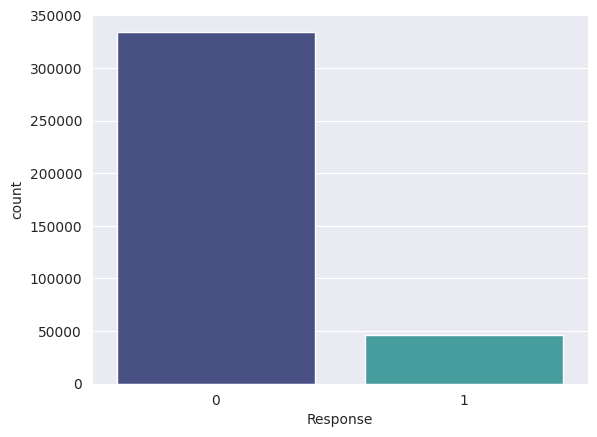

In [65]:
# Target variable countplot
sns.countplot(x=df['Response'], data=df, palette='mako')

As you can see from the above graph, the dataset is imbalanced.

In [66]:
#Defining X and y variable

X=df.drop(['Response'],axis=1)
y=df['Response']

In [67]:
# Handling imbalanced dataset using SMOTE method

sm=SMOTE()
x_new, y_new = sm.fit_resample(X, y.ravel())

print("Before Using SMOTE, counts of label '1': {}".format(sum(y == 1)))
print("Before Using SMOTE, counts of label '0': {} \n".format(sum(y == 0)))
print("After Using SMOTE, counts of label '1': {}".format(sum(y_new == 1)))
print("After Using SMOTE, counts of label '0': {} \n".format(sum(y_new == 0)))
print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Before Using SMOTE, counts of label '1': 46710
Before Using SMOTE, counts of label '0': 334399 

After Using SMOTE, counts of label '1': 334399
After Using SMOTE, counts of label '0': 334399 





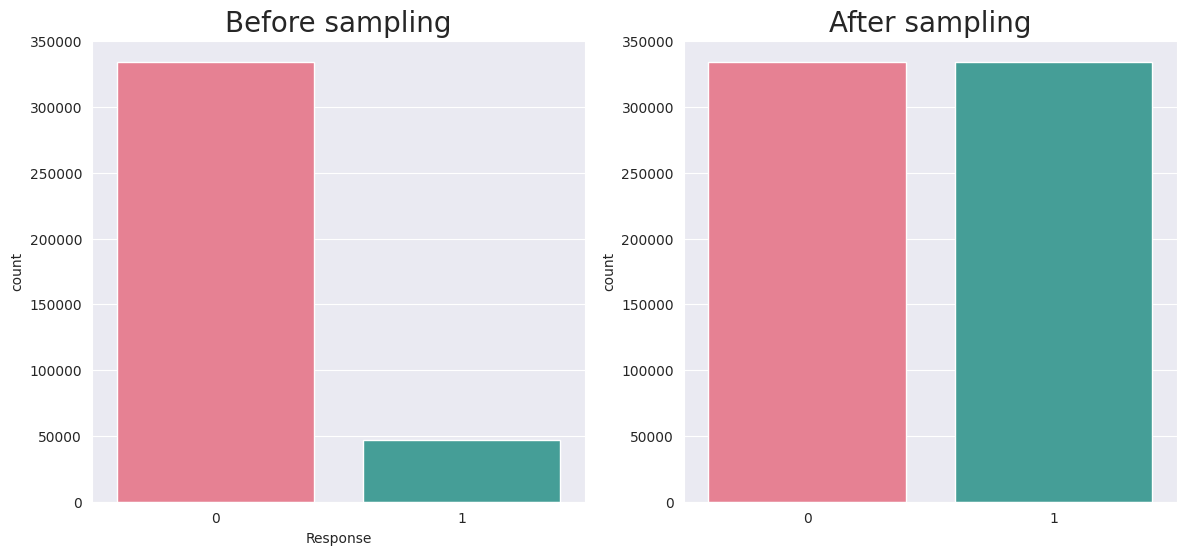

In [68]:
# Visualizing the balanced dataset

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x=df['Response'], data=df, palette='husl')
plt.title('Before sampling',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x=y_new,palette='husl')
plt.title('After sampling',fontsize=20)
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE method to handle the class imbalance because it simply duplicates examples from the minority class in the training dataset prior to fitting a model. Although this balances the class distribution, it does not provide any additional information to the model.

### 7. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Train test split our data

X_train,X_test,y_train,y_test = train_test_split(x_new,y_new, test_size=0.2,random_state=2)

##### What data splitting ratio have you used and why?

I have used 80-20 split ratio. This optimal ratio provides enough data for the model to train and test.
This is a common splitting ratio used in machine learning, where a larger proportion of the data is used for training to ensure the model has enough data to learn from. The smaller proportion of data allocated for testing is used to evaluate the model's performance on unseen data, which helps to assess how well the model is generalizing to new data.

### 8. Data Scaling

In [70]:
# Normalizing the Dataset using Standard Scaling Technique.

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


##### Which method have you used to scale you data and why?

I have used standard scaler. As the dataset had values ranging from -30 & 3000, a scaling method had to be used for optimal model performance.

## ***7. ML Model Implementation***

### ML Model - 1

In [71]:
# ML Model - 1 Implementation
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(X_train,y_train)

# Predict on the model
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Evaluation
RS_lr= recall_score(y_test, y_pred_lr)
print("Recall_Score : ", RS_lr)

PS_lr= precision_score(y_test, y_pred_lr)
print("Precision_Score :",PS_lr)

f1S_lr= f1_score(y_test, y_pred_lr)
print("f1_Score :", f1S_lr)

AS_lr= accuracy_score(y_test , y_pred_lr)
print("Accuracy_Score :",AS_lr)

acu_lr = roc_auc_score(y_test , y_pred_lr)
print("ROC_AUC Score:",acu_lr)

Recall_Score :  0.8949551102919318
Precision_Score : 0.7696801574923938
f1_Score : 0.8276037442784292
Accuracy_Score : 0.8124700956937799
ROC_AUC Score: 0.8119787885254256


[[48467 18017]
 [ 7067 60209]]




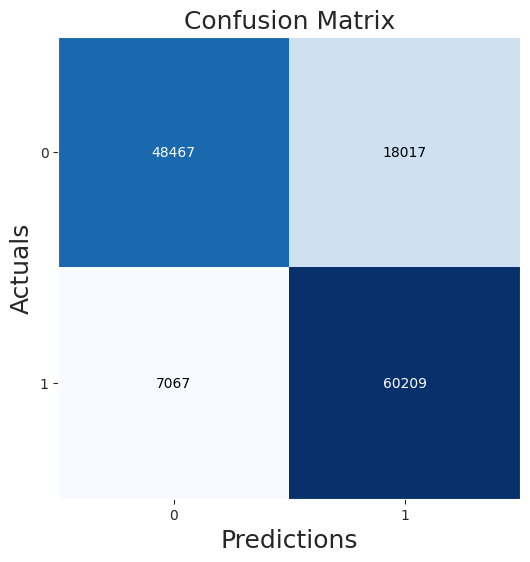

In [73]:
# Visualizing evaluation Metric Score chart
# Confusion matrix

cm_logistic = metrics.confusion_matrix(y_test, y_pred_lr)
print(cm_logistic)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

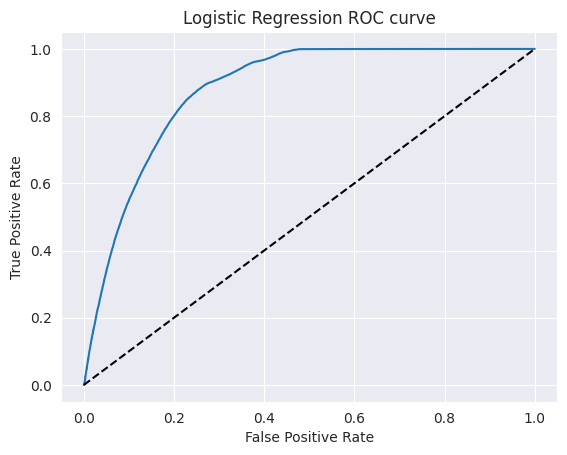

In [74]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an **overall accuracy of 81%**, meaning that it correctly classified 81% of the instances in the training set. **The precision for class 0 is 76%**, meaning that when the model predicted a class 0 instance, it was correct 76% of the time. **The recall for class 0 is 89%**, meaning that the model correctly identified 89% of the actual class 0 instances in the dataset. **The F1-score for class 0 is 82%**.


Overall, the model seems to be performing reasonably well, with an accuracy of 81% on test set.

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(lr, param_grid, cv=5)

# Fit the Algorithm
grid_lr.fit(X_train, y_train)

# Predict on the model
y_pred_gcv = grid_lr.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV** is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the combination that gives the best performance on a validation set.

In this case, the grid of hyperparameters included different values of C, which controls the regularization strength of the logistic regression model. The reason for using GridSearchCV is that it exhaustively searches over the entire grid of hyperparameters, which helps to find the optimal combination of hyperparameters that gives the best performance on the validation set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [76]:
# Evaluation
RS_lr_gcv= recall_score(y_test, y_pred_gcv)
print("Recall_Score : ", RS_lr_gcv)

PS_lr_gcv= precision_score(y_test, y_pred_gcv)
print("Precision_Score :",PS_lr_gcv)

f1S_lr_gcv = f1_score(y_test, y_pred_gcv)
print("f1_Score :", f1S_lr_gcv)

AS_lr_gcv = accuracy_score(y_test , y_pred_gcv)
print("Accuracy_Score :",AS_lr_gcv)

acu_lr_gcv = roc_auc_score(y_test , y_pred_gcv)
print("ROC_AUC Score:",acu_lr_gcv)

Recall_Score :  0.8949551102919318
Precision_Score : 0.7696801574923938
f1_Score : 0.8276037442784292
Accuracy_Score : 0.8124700956937799
ROC_AUC Score: 0.8119787885254256


In [77]:
print("Best cross-validation score:", grid_lr.best_score_)
print("Best parameters:", grid_lr.best_params_)

Best cross-validation score: 0.8112059326098897
Best parameters: {'C': 10}


The best **cross-validation score achieved was 0.81**, and the best hyperparameter value for **C was found to be 10**.

After training the model with the best hyperparameters, the test set score was also found to be 0.81. This suggests that the model is performing consistently well on both the training and test sets, and that it is unlikely to be overfitting.

Overall, it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an **f1 score of 0.82**.

### ML Model - 2

In [78]:
# ML Model - 2 Implementation
rfc = RandomForestClassifier()

# Fit the Algorithm
rfc.fit(X_train,y_train)

# Predict on the model
y_pred_rfc = rfc.predict(X_test)
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Evaluation
RS_rfc= recall_score(y_test, y_pred_rfc)
print("Recall_Score : ", RS_rfc)

PS_rfc= precision_score(y_test, y_pred_rfc)
print("Precision_Score :",PS_rfc)

f1S_rfc = f1_score(y_test, y_pred_rfc)
print("f1_Score :", f1S_rfc)

AS_rfc = accuracy_score(y_test , y_pred_rfc)
print("Accuracy_Score :",AS_rfc)

acu_rfc = roc_auc_score(y_test , y_pred_rfc)
print("ROC_AUC Score:",acu_rfc)

Recall_Score :  0.9124204768416672
Precision_Score : 0.8389689199901593
f1_Score : 0.8741544552199484
Accuracy_Score : 0.8678678229665072
ROC_AUC Score: 0.8676024530890244


[[54702 11782]
 [ 5892 61384]]




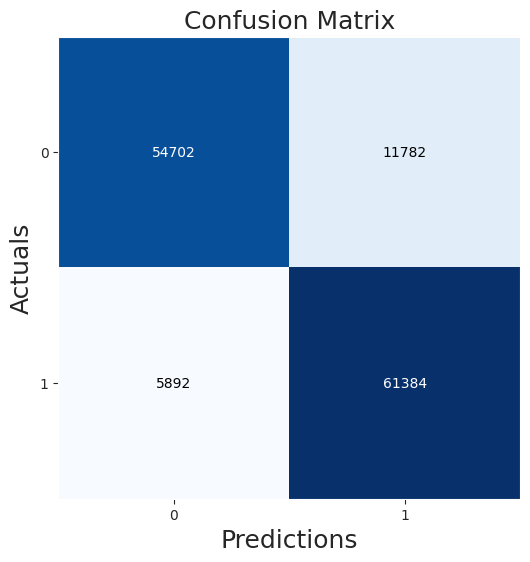

In [80]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix

cm_rf= metrics.confusion_matrix(y_test, y_pred_rfc)
print(cm_rf)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

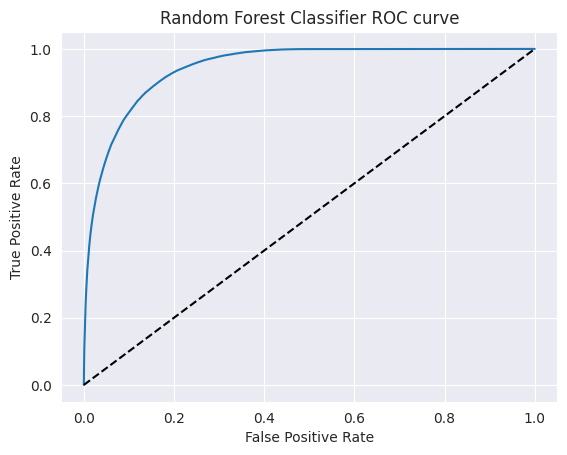

In [81]:
#ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rfc)
plt.title('Random Forest Classifier ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

The ML model used is Random Forest for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.86**, which means that 86% of the predictions made by the model are correct. **The precision for class 0 is 0.83**, which means that out of all the positive predictions made for class 0, 83% of them are actually correct. **The recall for class 1 is 0.91**, which means that out of all the actual positive instances of class 1, the model correctly identified 91% of them. **The F1-score for class 2 is 0.87**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

In summary, the Random Forest model has better performance on this classification task compared to logistic regression classifier.

#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# ML Model - 2 Implementation with hyperparameter optimization techniques GridSearch CV

clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


# Fit the Algorithm
clsr.fit(X_train, y_train)

# Predict on the model
y_pred_rfc_gcv = clsr.predict(X_test)

In [83]:
# Evaluation
RS_rfc_gcv= recall_score(y_test, y_pred_rfc_gcv)
print("Recall_Score : ", RS_rfc_gcv)

PS_rfc_gcv = precision_score(y_test, y_pred_rfc_gcv)
print("Precision_Score :",PS_rfc_gcv)

f1S_rfc_gcv = f1_score(y_test, y_pred_rfc_gcv)
print("f1_Score :", f1S_rfc_gcv)

AS_rfc_gcv = accuracy_score(y_test , y_pred_rfc_gcv)
print("Accuracy_Score :",AS_rfc_gcv)

acu_rfc_gcv = roc_auc_score(y_test , y_pred_rfc_gcv)
print("ROC_AUC Score:",acu_rfc_gcv)

Recall_Score :  0.9075599024912302
Precision_Score : 0.7799920796126675
f1_Score : 0.8389543471539967
Accuracy_Score : 0.8247532894736842
ROC_AUC Score: 0.8242600667621304


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, we did not see any improvement here.

### ML Model - 3

In [84]:
# ML Model - 3 Implementation
xgb = XGBClassifier()

# Fit the Algorithm
xgb.fit(X_train, y_train)

# Predict on the model
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Evaluation
RS_xgb= recall_score(y_test, y_pred_xgb)
print("Recall_Score : ", RS_xgb)

PS_xgb= precision_score(y_test, y_pred_xgb)
print("Precision_Score :",PS_xgb)

f1S_xgb = f1_score(y_test, y_pred_xgb)
print("f1_Score :", f1S_xgb)

AS_xgb = accuracy_score(y_test , y_pred_xgb)
print("Accuracy_Score :",AS_xgb)

acu_xgb = roc_auc_score(y_test , y_pred_xgb)
print("ROC_AUC Score:",acu_xgb)

Recall_Score :  0.904914085260717
Precision_Score : 0.8128362951787121
f1_Score : 0.856407334726003
Accuracy_Score : 0.8473758971291866
ROC_AUC Score: 0.8470331812501768


[[52466 14018]
 [ 6397 60879]]




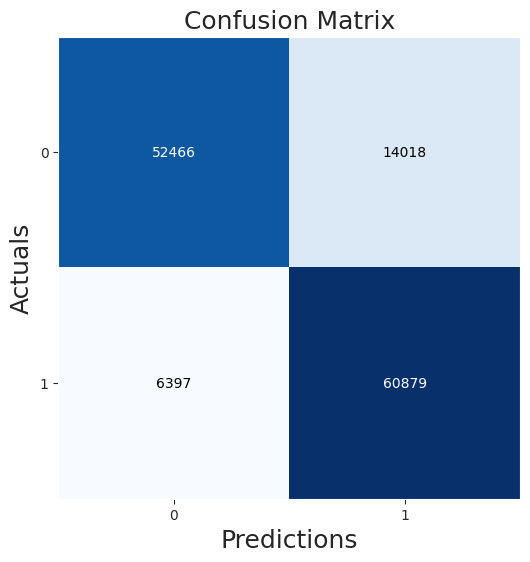

In [86]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix

cm_rf= metrics.confusion_matrix(y_test, y_pred_xgb)
print(cm_rf)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

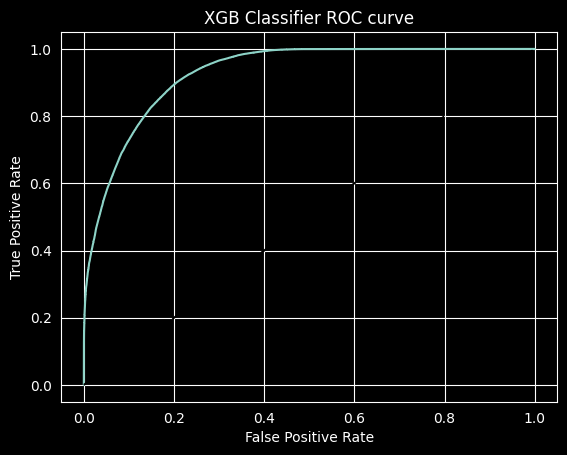

In [93]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.title('XGB Classifier ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 3 Implementation with hyperparameter optimization techniques GridSearch CV
# Define the hyperparameter search space

params = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [10, 20],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_pred_xgb_gcv = grid_search.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV** is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the combination that gives the best performance on a validation set.

In this case, the grid of hyperparameters included different values of C, which controls the regularization strength of the logistic regression model. The reason for using GridSearchCV is that it exhaustively searches over the entire grid of hyperparameters, which helps to find the optimal combination of hyperparameters that gives the best performance on the validation set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [89]:
# Evaluation
RS_xgb_gcv= recall_score(y_test, y_pred_xgb_gcv)
print("Recall_Score : ", RS_xgb_gcv)

PS_xgb_gcv = precision_score(y_test, y_pred_xgb_gcv)
print("Precision_Score :",PS_xgb_gcv)

f1S_xgb_gcv = f1_score(y_test, y_pred_xgb_gcv)
print("f1_Score :", f1S_xgb_gcv)

AS_xgb_gcv = accuracy_score(y_test , y_pred_xgb_gcv)
print("Accuracy_Score :",AS_xgb_gcv)

acu_xgb_gcv = roc_auc_score(y_test , y_pred_xgb_gcv)
print("ROC_AUC Score:",acu_xgb_gcv)

Recall_Score :  0.9332748677091385
Precision_Score : 0.7674640329540038
f1_Score : 0.8422867184932288
Accuracy_Score : 0.8242150119617225
ROC_AUC Score: 0.8235654165270918


No, we did not see any improvement here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have chosen f1-score score as it is best able to explain the fit of the data by taking the harmonic mean of precision score & recall score. F1-score is also the unweighted mean of these scores across all classes. In the best case, the macro average for precision, recall, and F1-score is 87%.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen Random Forest Regressor as my final classifier model. With a f1-score score of 87%, we can consider random forest classifier as our best model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [90]:
features = x_new.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

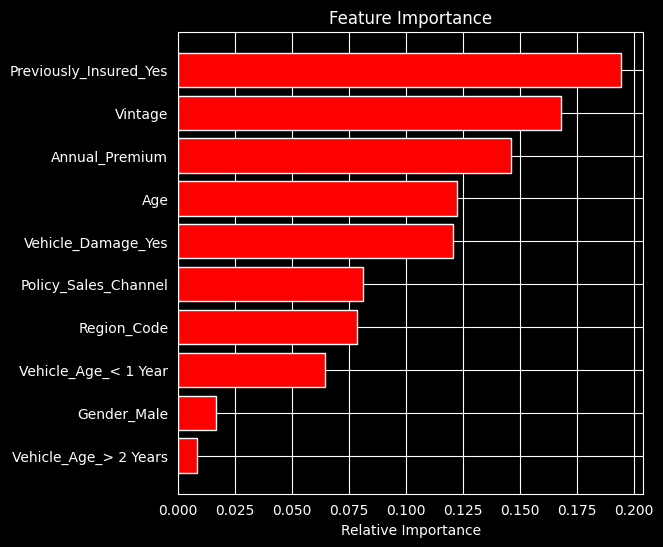

In [92]:
#Plotting figure
plt.figure(figsize=(6,6))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


As we can see from the feature importance graph, the feature 'Previously_Insured_yes' can be considered as most important with relative importance of 0.2. The next 4 features are vintage, annual_premium, age and vehicle_damage-yes can be considered with relative importance ranging from 0.125-0.175. As these 5 main features play a role in decreasing the value of entropy, the machine learning model, random forest classifier considers them closer to the root node.

# **Conclusion**

In our analysis, we initiated the Exploratory Data Analysis (EDA) by thoroughly examining all the features within our dataset. Our primary focus was on the dependent variable, 'Response,' which we analyzed and transformed. Moving forward, we delved into categorical variables, opting to discard those with a predominant class. Additionally, we scrutinized numerical variables, exploring correlations, distributions, and their relationships with the dependent variable. To enhance our analysis, we proceeded to apply one-hot encoding to the categorical variables.

Subsequently, we implemented three distinct machine learning algorithms: Logistic Regression, Random Forest Classifier, and XG-Boost. Hyperparameter tuning was employed as part of our efforts to optimize model performance.

Among the models considered, the Random Forest Classifier emerged as the most promising, achieving the highest F1-score of 87% on the test set. Importantly, our evaluation did not reveal any signs of overfitting.

**In conclusion, we recommend the deployment of a machine learning model utilizing the Random Forest Classifier** to predict whether existing health insurance customers would express interest in a vehicle insurance product. **The insurance company can now strategically enhance the conversion rate by incentivizing the purchase of vehicle insurance and streamlining the application and claim settlement processes by considering the above crutial features.** Cross-selling initiatives could prove effective in boosting profits, especially considering the customer acquisition cost remains at zero. This comprehensive approach harnesses the predictive power of machine learning to optimize business outcomes and align with the company's strategic goals.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***